In [89]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Take Montogomery as an example, based on the website https://www.usnews.com/education/k12/middle-schools/alabama/montgomery-public-schools-102843, I found out that there were 13 middle schools in Montgomery city in 2024. Based on the same website, I get the enrollment size of each school in 2024.
But we decided to exclude some schools that don’t meet the requirements. Baldwin Art and Academics Magnet school within a system is excluded due to some variable that isn't apparent to us. Children Center, Pintlala Elementary School, Dunbarramer, and Mcintyre Comprehensive academy are excluded because they include some grades other than 6 to 8 grades. At last, we have 8 middle schools and 5799 students in the sampling frame.

We did the same seletion criterion for the other region's schools.


In [90]:
import pandas as pd
import numpy as np
# Define each school and its enrollment size in each region
montogomery_school_dic = {
    'Floyd Middle School': 467,
    'Carr Middle School': 803,
    'Brewbaker Middle School': 963,
    'Southlawn Middle School': 569,
    'Capitol Heights Middle School': 702,
    'Bellingrath Middle School': 557,
    'Goodwyn Middle School': 984,
    'Mckee Middle School': 754,
}
birmingham_school_dic={
    'Jones Vally Middle School':509,
    'Smith Middle School': 463,
    'Bush Hills Steam Academy Middle School':461,
    'Wilkerson Middle School': 385,
    'Ossie Ware Mitchell Middle School': 319,
    'Green Acres Middle School': 343
}
decatur_school_dic={
    'Austin Middle School': 1154,
    'Decatur Middle School': 856
}
mobile_school_dic={
    'Bernice J Causey Middle School': 1455,
    'Semmes Middle School':1444,
    'Katherine H Hankins Middle School':836,
    'Burns Middle School': 814,
    'Peter F Alba Middle School':523,
    'Lott Middle School': 447,
    'Mobile County Traning Middle School': 206
}
tuscaloosa_school_dic={
    'Northridge Middle School': 768,
    'Eastwood Middle School': 771,
    'Westlawn Middle School': 545
}



In [91]:
# Combine all school data into one DataFrame
def create_df(school_dic, region_name):
    df = pd.DataFrame(list(school_dic.items()), columns=['School Name', 'Enrollment Size'])
    df['Region Name'] = region_name
    return df

montogomery_df = create_df(montogomery_school_dic, 'Montgomery')
birmingham_df = create_df(birmingham_school_dic, 'Birmingham')
decatur_df = create_df(decatur_school_dic, 'Decatur')
mobile_df = create_df(mobile_school_dic, 'Mobile')
tuscaloosa_df = create_df(tuscaloosa_school_dic, 'Tuscaloosa')

# Combine all regions into one DataFrame
all_schools_df = pd.concat([montogomery_df, birmingham_df, decatur_df, mobile_df, tuscaloosa_df], ignore_index=True)

# Save to CSV
all_schools_df.to_csv('all_schools.csv', index=False)
all_schools_df

,School Name,Enrollment Size,Region Name
0,Floyd Middle School,467,Montgomery
1,Carr Middle School,803,Montgomery
2,Brewbaker Middle School,963,Montgomery
3,Southlawn Middle School,569,Montgomery
4,Capitol Heights Middle School,702,Montgomery
5,Bellingrath Middle School,557,Montgomery
6,Goodwyn Middle School,984,Montgomery
7,Mckee Middle School,754,Montgomery
8,Jones Vally Middle School,509,Birmingham
9,Smith Middle School,463,Birmingham


Getting response rate for each region from 2016 Data:


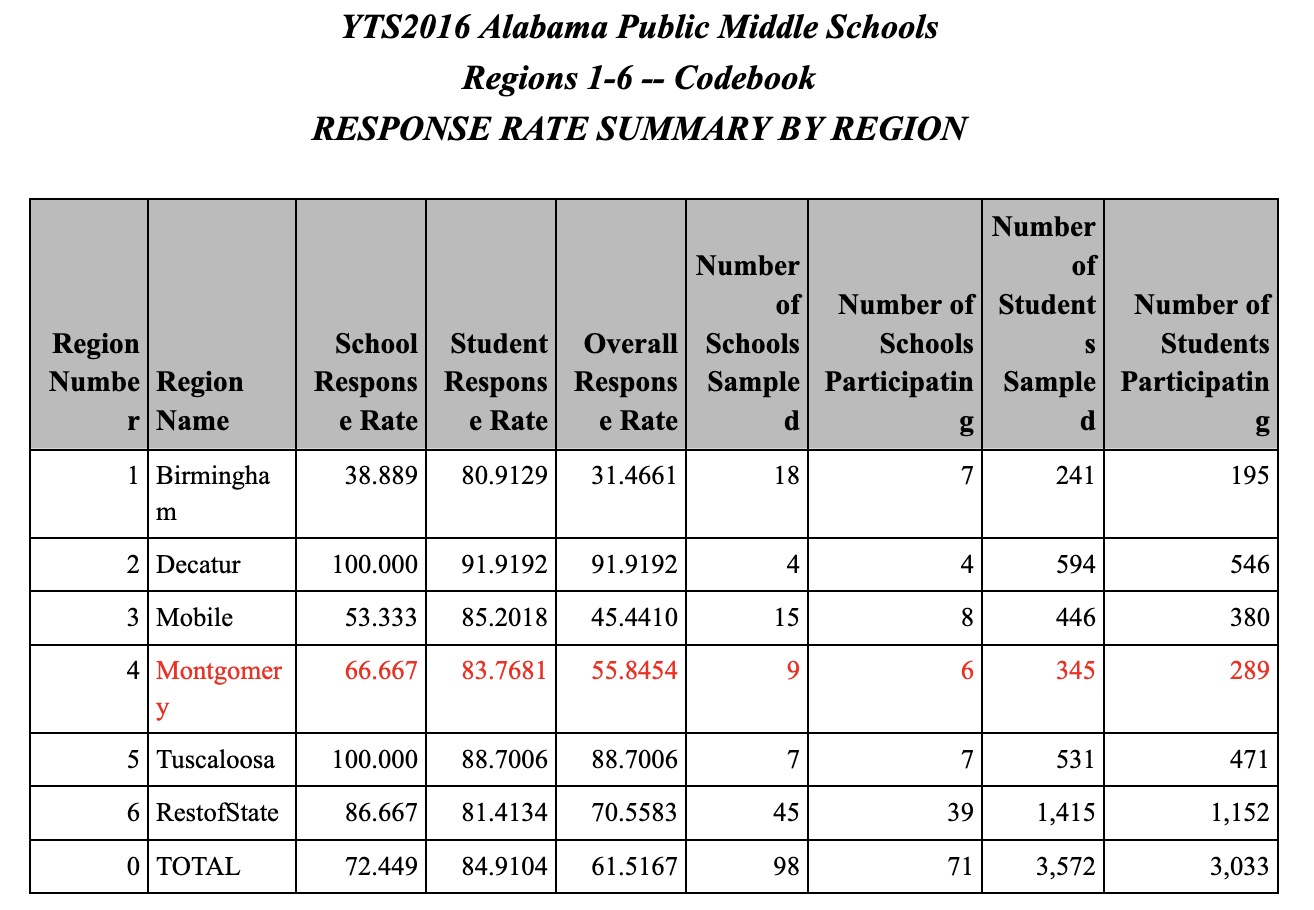


Still take Montgomery as an example, nine schools were sampled but six schools participated in the survey in 2016. The school response rate is 0.667.  345 students were sampled but 289 students participated so the student response rate is 0.8377.


Overall Sampling Fraction in Montgomery in 2024:
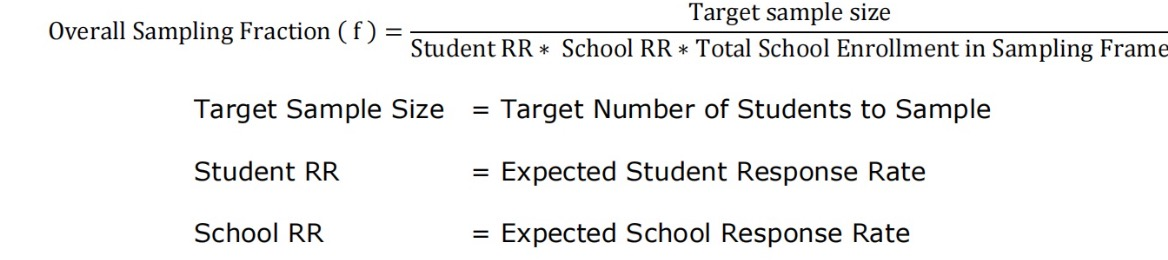
The target sample size is 289 in 2016 for Montgomery.
For 2024 data, total school enrollment in the sampling frame is 5799. We assume the same target sample size for 2024, which is 289. Also, we assume the same school and student response rate as 2016 which are 0.8377 and 0.667.
Then we can calculate the overall sampling fraction in 2024 is 289/(0.8377* 0.667 * 5799)=0.096


There is a exception region "RestofState" in 2016 Alabama dataset, which contains 45 middle schools. If I base on the us news website, there is no specific location, so there are 910 schools and I can't decide which school to select. Therefore, I decide to use this website, https://reportcard.alsde.edu/SelectSchool.aspx the section Alabama State Department of Education. I assume the RestofState has the same overall students number of students in Alabama, and then I apply it into my 2024 dataset. I also assume they select the same number of school(45) in 2016 towards 2024 for the RestofState. the total school enrollment in the samoling frame is (729789/1363)*45. 729789 is the total students in Alabama and 1363 is the total schools in Alabama base on https://reportcard.alsde.edu/SelectSchool.aspx.


In [92]:
# 0. Overall Sampling Fraction in each region in 2024:
montogomery_overall_sampling_fraction=289/(0.8377*0.667*sum(montogomery_school_dic.values()))
birmingham_overall_sampling_fraction=195/(0.809*0.3889*sum(birmingham_school_dic.values()))
decatur_overall_sampling_fraction=546/(1*0.9191*sum(decatur_school_dic.values()))
tuscaloosa_overall_sampling_fraction=471/(1*0.887*sum(tuscaloosa_school_dic.values()))
mobile_overall_sampling_fraction=380/(0.5333*0.852*sum(mobile_school_dic.values()))
restofstate_overall_sampling_fraction=1152/(0.7249*0.8491*(729789/1363)*45)
montogomery_overall_sampling_fraction


0.08919292052342868

**For the following parts, I will do the Montgomery region sample and weighting first.**

1.First Stage Sampling Fraction (Probability of selecting a school): Systematic sample the school based on the proportional to school enrollment size.

First we determine which schools are certainty schools and which are not and find out all of them belong to certainty schools. So all 8 middle schools should be selected as samples. The Sampling Fraction for Certainty Schools is fschool = 1.

So W1(school selection weight)=the inverse of the sampling fraction of selecting school=1/1=1.


In [93]:
def school_weight(school_dic):
    sorted_school_dic = dict(sorted(school_dic.items(), key=lambda item: item[1], reverse=True))
    enrollment_sum=sum(school_dic.values())
    length=len(montogomery_school_dic)

    # function to classified school as Certainty school and Noncertainty school.
    def dertermine_school(enrollment_sum, length, sorted_school_dic):
        initial_sample_interval=enrollment_sum/length
        certainty_school_list=[]
        remove_list=[]
        while True:
            for i in sorted_school_dic:
                if sorted_school_dic[i]>=initial_sample_interval:
                    certainty_school_list.append(i)
                    enrollment_sum-=school_dic[i]
                    length-=1
                    remove_list.append(i)
            #break when there is no certainty school any more or all of them have been determined as certainty school
            if not remove_list or length==0:
                break
            for j in remove_list:
                del sorted_school_dic[j]
            remove_list=[]
            #revised sample interval
            initial_sample_interval=enrollment_sum/length
        return certainty_school_list

    certainty_school_list=dertermine_school(enrollment_sum, length, sorted_school_dic)
    school_weight1_dic={}
    for i in certainty_school_list:
        school_weight1_dic[i]=1 #assign school weight 1 to certainty school
    return school_weight1_dic, certainty_school_list
school_weight1_dic, certainty_school_list=school_weight(montogomery_school_dic)
school_weight1_dic

{'Goodwyn Middle School': 1,
 'Brewbaker Middle School': 1,
 'Carr Middle School': 1,
 'Mckee Middle School': 1,
 'Capitol Heights Middle School': 1,
 'Southlawn Middle School': 1,
 'Bellingrath Middle School': 1,
 'Floyd Middle School': 1}

**2. F1- School Non-response adjustment**

We divide the school into three categories(Lagre, Medium, and Small) based on the enrollment size. For each category, use the following formula to calculate. The numerator is the selected sample. The denominator is the participating sample.


We selected all 8 schools as our sample. The school selection weight is all 1.

We divide middle schools into three categories based on the enrollment size and reach the result.
Original Small Schools: ['Carr Middle School', 'Capitol Heights Middle School']

Original Medium Schools: ['Floyd Middle School', 'Bellingrath Middle School', 'Mckee Middle School']

Original Large Schools: ['Brewbaker Middle School', 'Southlawn Middle School', 'Goodwyn Middle School']

We assume the same school response rate in 2024 as in 2016 which is 0.667. So in each category, we multiply the response rate of each size of category and pick the first number of schools in each category and suppose they are participating in the survey.
Reduced Small Schools: ['Carr Middle School']

Reduced Medium Schools: ['Floyd Middle School', 'Bellingrath Middle School']

Reduced Large Schools: ['Brewbaker Middle School', 'Southlawn Middle School']

In each category, we calculate the school nonresponse adjustment for each school and store it in the school_nonresponse_adjustment.

In [94]:
# #2. F1- School Non-response adjustment
def school_nonresponse_adjustment_func(school_dic, school_response_rate,school_weight1_dic):
    def distribute_schools(school_dic, response_rate):
        # Sort the schools based on size in descending order
        sorted_schools_list = sorted(school_dic.keys(), key=lambda item: item[1], reverse=True)
        total_schools = len(sorted_schools_list)

        # Initialize lists for each group
        group1, group2, group3 = [], [], []

        # Calculate the number of schools in each group
        base_size = total_schools // 3
        remainder = total_schools % 3
        group_sizes = [base_size] * 3
        for i in range(remainder):
            group_sizes[i] += 1

        # Populate the lists based on the specified group sizes
        index = 0
        for size in group_sizes:
            if len(group1) < size:
                group1.extend(sorted_schools_list[index:index + size])
            elif len(group2) < size:
                group2.extend(sorted_schools_list[index:index + size])
            else:
                group3.extend(sorted_schools_list[index:index + size])
            index += size
            # Calculate reduced group sizes based on the response rate
        reduced_group1_size = round(len(group1) * response_rate)
        reduced_group2_size = round(len(group2) * response_rate)
        reduced_group3_size = round(len(group3) * response_rate)

        # Select the first number of schools in each group as the reduced group
        reduced_group1 = group1[:reduced_group1_size]
        reduced_group2 = group2[:reduced_group2_size]
        reduced_group3 = group3[:reduced_group3_size]

        return group1, group2, group3, reduced_group1, reduced_group2, reduced_group3

    large_schools, medium_schools, small_schools,reduced_large_schools, reduced_medium_schools, reduced_small_schools=distribute_schools(school_dic, school_response_rate)
    print('reduced_large_schools: ',reduced_large_schools)
    print('reduced_medium_schools: ', reduced_medium_schools)
    print('reduced_small_schools: ', reduced_small_schools)
    # calculate the school nonresponse adjustment
    small_select_school=0
    medium_select_school=0
    large_select_school=0
    small_participation_school=0
    medium_participation_school=0
    large_participation_school=0
    for i in small_schools:
        small_select_school+=school_dic[i]*school_weight1_dic[i]
    for i in medium_schools:
        medium_select_school+=school_dic[i]*school_weight1_dic[i]
    for i in large_schools:
        large_select_school+=school_dic[i]*school_weight1_dic[i]
    for i in reduced_small_schools:
        small_participation_school+=school_dic[i]*school_weight1_dic[i]
    for i in reduced_medium_schools:
        medium_participation_school+=school_dic[i]*school_weight1_dic[i]
    for i in reduced_large_schools:
        large_participation_school+=school_dic[i]*school_weight1_dic[i]

    # summarize the school nonresponse adjustment in each school
    school_nonresponse_adjustment1={}
    for i in reduced_small_schools:
        school_nonresponse_adjustment1[i]=small_select_school/small_participation_school
    for i in reduced_medium_schools:
        school_nonresponse_adjustment1[i] = medium_select_school / medium_participation_school
    for i in reduced_large_schools:
        school_nonresponse_adjustment1[i]=large_select_school/large_participation_school
    return school_nonresponse_adjustment1, reduced_large_schools, reduced_medium_schools, reduced_small_schools
montogoery_school_response_rate=0.667
school_nonresponse_adjustment, reduced_large_schools, reduced_medium_schools, reduced_small_schools=school_nonresponse_adjustment_func(montogomery_school_dic, montogoery_school_response_rate, school_weight1_dic)
school_nonresponse_adjustment

reduced_large_schools:  ['Brewbaker Middle School', 'Southlawn Middle School']
reduced_medium_schools:  ['Floyd Middle School', 'Bellingrath Middle School']
reduced_small_schools:  ['Carr Middle School']


{'Carr Middle School': 1.8742216687422166,
 'Floyd Middle School': 1.736328125,
 'Bellingrath Middle School': 1.736328125,
 'Brewbaker Middle School': 1.6422976501305484,
 'Southlawn Middle School': 1.6422976501305484}

**3. Second Stage Sampling Fraction (Probability of selection within school)**

fclass = f because f=fclass* fschool and  fschool=1 for certainty school.

W2(class selection weight)=Within school interval=fschool / f=1/0.089=11.2359.
I store it in the class_weight2_dic.

In [95]:
def class_weight2_func(certainty_school_list, overall_sampling_fraction):
  class_weight2_dic1={}
  #for certainty school
  for i in certainty_school_list:
      class_weight2_dic1[i]=1/overall_sampling_fraction
  return class_weight2_dic1
class_weight2_dic=class_weight2_func(certainty_school_list, montogomery_overall_sampling_fraction)
class_weight2_dic

{'Goodwyn Middle School': 11.211652159515571,
 'Brewbaker Middle School': 11.211652159515571,
 'Carr Middle School': 11.211652159515571,
 'Mckee Middle School': 11.211652159515571,
 'Capitol Heights Middle School': 11.211652159515571,
 'Southlawn Middle School': 11.211652159515571,
 'Bellingrath Middle School': 11.211652159515571,
 'Floyd Middle School': 11.211652159515571}

Based on the Alabama YTS 2016-MS of Montgomery, there are 15 psu, each psu represents a class. One strat has 4 psu and 81 students. One strat has 3 psu and 55 students. The other four strat have 2 psu and around 35 students.

So in our case, for two large schools, I assign each one with 3 psu, and 100 students. For the two middle schools, I assign each one with 2 psu and 60 students. For the one small school, I assign this one with 1 psu and 25 students. In Total, there are 345 students in the sample, which is the same as 2016 Alabama number of students sampled.


In [96]:
# -----define selected students in each selected school. Ex: (80,3), 80 is number of students selected in this school, 3 is number of psus this school has
school_student_selected={}
for i in reduced_large_schools:
    school_student_selected[i]=(100, 3)
for i in reduced_medium_schools:
    school_student_selected[i]=(60, 2)
for i in reduced_small_schools:
    school_student_selected[i]=(25, 1)
school_student_selected

{'Brewbaker Middle School': (100, 3),
 'Southlawn Middle School': (100, 3),
 'Floyd Middle School': (60, 2),
 'Bellingrath Middle School': (60, 2),
 'Carr Middle School': (25, 1)}

**4. Class Non-Response Adjustment(f2):**
This adjustment only applies when the entire class does not respond but this school participates in this survey.  I think such a case is less likely to happen so I set it as 1 for all schools and students in all regions.
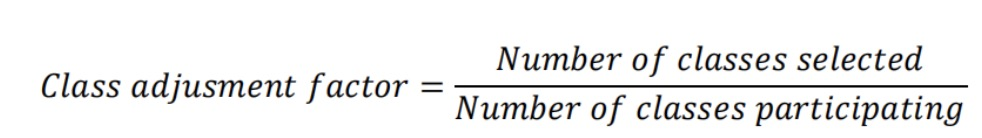
I store it in the class_nonresponse_adjustment.


In [97]:
#4. Class Non-Response Adjustment(f2):
def class_nonresponse_adjustment_func(school_student_selected):
  class_nonresponse_adjustment={}
  for i in school_student_selected:
      class_nonresponse_adjustment[i]=1
  return class_nonresponse_adjustment
class_nonresponse_adjustment=class_nonresponse_adjustment_func(school_student_selected)
class_nonresponse_adjustment

{'Brewbaker Middle School': 1,
 'Southlawn Middle School': 1,
 'Floyd Middle School': 1,
 'Bellingrath Middle School': 1,
 'Carr Middle School': 1}

5. **Student Non-Response Adjustment(f3):
Student weight is W2 in this case.**
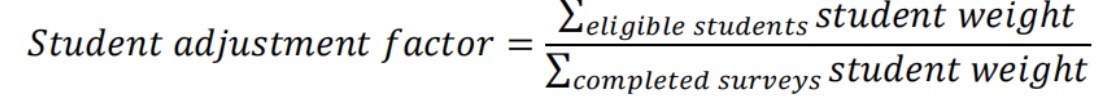
Because we don’t know how many students are selected and participate in each school. We assume the overall student response rate=288/345=0.838, which is the same as in 2016. So I use the same response rate for each school.

Then we can get eligible students and completed students in each school. By multiplying their weight for each school, I get the value of student adjustment factor and store it in the student_nonresponse_adjustment.


In [98]:
# 5. Student Non-Response Adjustment(f3):
def student_nonresponse_adjustment_func(student_response_rate, school_student_selected, class_weight2_dic):
  student_nonresponse_adjustment={}

  school_student_participate={}
  for i in school_student_selected:
      students, psu=school_student_selected[i]
      school_student_participate[i]=(round(students*student_response_rate), psu)

  for i in school_student_selected:
      participate_students = school_student_participate[i][0]
      selected_students= school_student_selected[i][0]
      student_nonresponse_adjustment[i]=(selected_students*class_weight2_dic[i])/(participate_students*class_weight2_dic[i])
  return student_nonresponse_adjustment, school_student_participate
montogoery_student_response_rate=0.838
student_nonresponse_adjustment, school_student_participate=student_nonresponse_adjustment_func(montogoery_student_response_rate, school_student_selected, class_weight2_dic)
student_nonresponse_adjustment
school_student_participate

{'Brewbaker Middle School': (84, 3),
 'Southlawn Middle School': (84, 3),
 'Floyd Middle School': (50, 2),
 'Bellingrath Middle School': (50, 2),
 'Carr Middle School': (21, 1)}

**6. Create the data file including grade, race and gender distribution**

Final Weight= (School Selection Weight) x (Class Selection Weight) x (Non-response
Weight) x (Post-Stratification Adjustment). Assume Post-Stratification Adjustment=1, and I will change it in the 7.

Then we can get each student's weight.


CR2, CR3 and CR5 and each missing values：
Based on the Alabama YTS 2016-MS, there are a total of 288 students in Montgomery. Column CR2 represents gender and there are two missing values and the missing rate is 2/288=0.0069. Column CR3 represents grade and there are 6 missing values and the missing rate is 6/288=0.0201. Column CR5A to Column CR5E represent race and there are 15 missing values and the missing rate is 15/288=0.0521. We assume the missing value is the same as in 2016 and in 2024 for each column.

Based on the website, https://www.usnews.com/education/k12/middle-schools/alabama/montgomery-public-schools-102843, I can get each middle school’s gender, race and grade distribution in 2024 in Montgomery.
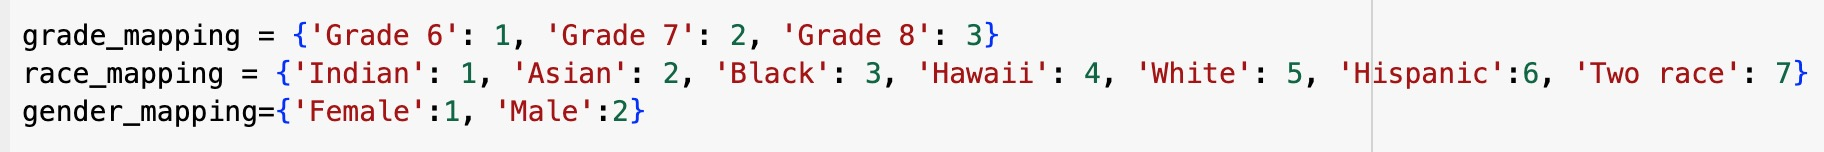

In [99]:

# 6. Create the Sample file

#calculate the final weight = (School Selection Weight) x (Class Selection Weight) x (Non-responseWeight) x (Post-Stratification Adjustment)
def final_weight(student_nonresponse_adjustment, school_nonresponse_adjustment, school_weight1_dic,class_weight2_dic):
  school_student_weight={}
  for i in student_nonresponse_adjustment:
      school_student_weight[i]=student_nonresponse_adjustment[i]*school_nonresponse_adjustment[i]*school_weight1_dic[i]*class_weight2_dic[i]
  return school_student_weight
school_student_weight=final_weight(student_nonresponse_adjustment,school_nonresponse_adjustment,school_weight1_dic,class_weight2_dic)
school_student_weight

{'Brewbaker Middle School': 21.920083328158945,
 'Southlawn Middle School': 21.920083328158945,
 'Floyd Middle School': 23.360528366740642,
 'Bellingrath Middle School': 23.360528366740642,
 'Carr Middle School': 25.015620737814945}

In [100]:
gender_distribution = {
    'Bellingrath Middle School': {'Male': 53, 'Female': 47},
    'Brewbaker Middle School': {'Male': 50, 'Female': 50},
    'Carr Middle School': {'Male': 48, 'Female': 52},
    'Southlawn Middle School': {'Male': 56, 'Female': 44},
    'Floyd Middle School': {'Male': 45, 'Female': 55}
}

grade_distribution = {
    'Bellingrath Middle School': {'Grade 6': 34.3, 'Grade 7': 32.1, 'Grade 8': 33.6},
    'Brewbaker Middle School': {'Grade 6': 33.7, 'Grade 7': 33.3, 'Grade 8': 32.9},
    'Carr Middle School': {'Grade 6': 30.3, 'Grade 7': 37.7, 'Grade 8': 32},
    'Southlawn Middle School': {'Grade 6': 33.4, 'Grade 7': 33.9, 'Grade 8': 32.7},
    'Floyd Middle School': {'Grade 6': 27.8, 'Grade 7': 34.9, 'Grade 8': 37.3}
}

race_distribution = {
    'Bellingrath Middle School': {'Indian': 0.4, 'Asian': 0.2, 'Black': 86.7, 'Hispanic': 8.6, 'White': 3.8, 'Two race': 0.2, 'Hawaii':0},
    'Brewbaker Middle School': {'Indian': 4.5, 'Asian': 0.5, 'Black': 80.2, 'Hispanic': 13.1, 'White': 1.3, 'Two race': 0.3, 'Hawaii':0},
    'Carr Middle School': {'Indian': 0.6, 'Asian': 8.6, 'Black': 82.8, 'Hispanic': 3.6, 'White': 3.6, 'Two race': 0.6, 'Hawaii':0.1},
    'Southlawn Middle School': {'Indian': 0.9, 'Asian': 0, 'Black': 83.7, 'Hispanic': 11.8, 'White': 3.2, 'Two race': 0.5, 'Hawaii':0},
    'Floyd Middle School': {'Indian': 0.6, 'Asian': 4.7, 'Black': 66.2, 'Hispanic': 5.1, 'White': 21.8, 'Two race': 1.5, 'Hawaii':0}
}

grade_mapping = {'Grade 6': 1, 'Grade 7': 2, 'Grade 8': 3}
race_mapping = {'Indian': 1, 'Asian': 2, 'Black': 3, 'Hawaii': 4, 'White': 5, 'Hispanic':6, 'Two race': 7}
gender_mapping={'Female':1, 'Male':2}

def generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, region_name, school_student_weight):
    #summarize each blank indices
    grade_empty_indices = []
    race_empty_indices = []
    gender_empty_indices=[]
    data = []

    # Generate the data for each student
    strat = 1
    current_psu = 1
    for school, (num_students, num_psu) in school_student_participate.items():
        psu_list = [current_psu + i % num_psu for i in range(num_students)]
        current_psu += num_psu
        male_prob = gender_distribution[school]['Male'] / 100
        female_prob = gender_distribution[school]['Female'] / 100

        grade_probs = [grade_distribution[school]['Grade 6'] / 100, grade_distribution[school]['Grade 7'] / 100,
                      grade_distribution[school]['Grade 8'] / 100]
        race_probs = [race_distribution[school]['Indian'] / 100, race_distribution[school]['Asian'] / 100,
                      race_distribution[school]['Black'] / 100, race_distribution[school]['Hawaii'] / 100,
                      race_distribution[school]['White'] / 100, race_distribution[school]['Hispanic'] / 100,race_distribution[school]['Two race'] / 100]
        # Normalize grade_probs to sum to 1
        grade_probs_sum = sum(grade_probs)
        if grade_probs_sum != 1:
            grade_probs = [prob / grade_probs_sum for prob in grade_probs]

        # Normalize race_probs to sum to 1
        race_probs_sum = sum(race_probs)
        if race_probs_sum != 1:
            race_probs = [prob / race_probs_sum for prob in race_probs]

        for i in range(num_students):
            if np.random.rand() < gender_missing_rate: #generate the missing values of gender
                cr2_gender = np.nan
                gender_empty_indices.append(len(data))
            else:
                cr2_gender = np.random.choice([1, 2], p=[female_prob, male_prob])

            if np.random.rand() < grade_missing_rate:
                cr3_grade = np.nan
                grade_empty_indices.append(len(data))
            else:
                cr3_grade = np.random.choice([1, 2, 3], p=grade_probs)

            if np.random.rand() < race_missing_rate:
                cr5_race = np.nan
                race_empty_indices.append(len(data))
            else:
                cr5_race = np.random.choice([1, 2, 3, 4, 5, 6, 7], p=race_probs)

            student_data = {
                'weight': school_student_weight[school],
                'strat': strat,
                'psu': psu_list[i],
                'WGTFLAG': 'U',
                'FinalWgt': 1,
                'Year': 2024,
                'State': 'AL',
                'Schoolname': school,
                'RegionName': region_name,
                'CR2': cr2_gender,
                'CR3': cr3_grade,
                'CR5': cr5_race
            }
            data.append(student_data)
        strat += 1

    df = pd.DataFrame(data)
    return df, grade_empty_indices, race_empty_indices, gender_empty_indices

# Assume the same as in 2016 Montogomery Data
gender_missing_rate=0.0069
grade_missing_rate=0.0201
race_missing_rate=0.0521
montogomery_df, grade_empty_indices, race_empty_indices, gender_empty_indices = generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, 'Montogomery', school_student_weight)
grade_empty_indices, race_empty_indices, gender_empty_indices

([22, 198],
 [4, 24, 30, 37, 39, 66, 75, 77, 105, 132, 133, 136, 196, 222, 246, 253],
 [7, 18, 27, 51])

**7. Post-Stratification Adjustment**

For respondents missing grade, the respondent is assigned a grade value based on the
average grade (rounded) of the student’s school. For respondents missing race,
randomly assign the respondent a race value (White, Black, Hispanic, or Other) based on the empirical distribution of the data.
Then for each student, use the following formula to calculate each post-stratification adjustment in grade-gender-race category.
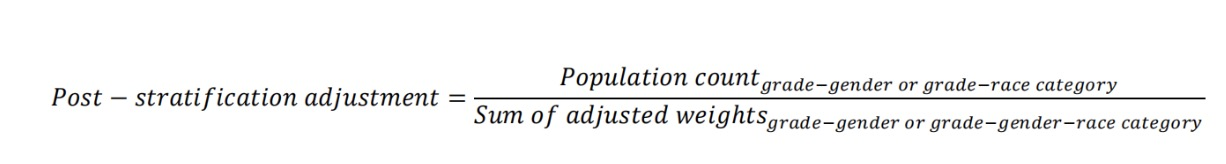
For the population count, we use each school enrollment size multiplied by its grade, race and gender distribution to get it. For the sum of adjusted weights, we sum each category weight in our sample.




After getting post-stratification adjustment, we can calculate Final Weight= (School Selection Weight) x (Class Selection Weight) x (Non-response
Weight) x (Post-Stratification Adjustment), and update it in the weight column.


In [101]:
# 7. Post-Stratification Adjustment
def post_stratification_adjustment(df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, school_dic):
    # Handle missing values
    # For gender, randomly assign Male or Female
    df.loc[gender_empty_indices, 'CR2'] = np.random.choice([1, 2], size=len(gender_empty_indices))

    # For grade, assign based on the average grade (rounded) of the student's school
    for idx in grade_empty_indices:
        school = df.loc[idx, 'Schoolname']
        avg_grade = round(sum([1 * grade_distribution[school]['Grade 6'], 2 * grade_distribution[school]['Grade 7'],
                              3 * grade_distribution[school]['Grade 8']]) / 100)
        df.loc[idx, 'CR3'] = avg_grade

    # For race, randomly assign based on the empirical distribution
    for idx in race_empty_indices:
        school = df.loc[idx, 'Schoolname']
        race_probs = [race_distribution[school]['Indian'] / 100, race_distribution[school]['Asian'] / 100,
                      race_distribution[school]['Black'] / 100, race_distribution[school]['Hawaii'] / 100,
                      race_distribution[school]['White'] / 100, race_distribution[school]['Hispanic'] / 100,
                      race_distribution[school]['Two race'] / 100]
        race_probs_sum = sum(race_probs)
        if race_probs_sum != 1:
            race_probs = [prob / race_probs_sum for prob in race_probs]
        df.loc[idx, 'CR5'] = np.random.choice([1, 2, 3, 4, 5, 6, 7], p=race_probs)

    # Calculate adjustment factors
    adjustment_factors = {}
    for school in school_student_participate:
        school_population = school_dic[school]
        school_data = df[df['Schoolname'] == school]

        for gender in gender_distribution[school]:
            for grade in grade_distribution[school]:
                for race in race_distribution[school]:
                    stratum_population = (school_population *
                                          gender_distribution[school][gender] / 100 *
                                          grade_distribution[school][grade] / 100 *
                                          race_distribution[school][race] / 100)

                    stratum_data = school_data[(school_data['CR2'] == gender_mapping[gender]) &
                                              (school_data['CR3'] == grade_mapping[grade]) &
                                              (school_data['CR5'] == race_mapping[race])]

                    sample_weight_sum = stratum_data['weight'].sum()
                    if sample_weight_sum > 0:
                        adjustment_factors[(school, gender, grade, race)] = stratum_population / sample_weight_sum
                    else:
                        adjustment_factors[(school, gender, grade, race)] = 0

    # Apply adjustment factors directly to the DataFrame
    df['weight'] = df.apply(
        lambda row: row['weight'] * adjustment_factors.get(
            (row['Schoolname'],
            'Male' if row['CR2'] == 2 else 'Female',
            'Grade 6' if row['CR3'] == 1 else ('Grade 7' if row['CR3'] == 2 else 'Grade 8'),
            'Indian' if row['CR5'] == 1 else ('Asian' if row['CR5'] == 2 else (
                'Black' if row['CR5'] == 3 else ('Hawaii' if row['CR5'] == 4 else (
                    'White' if row['CR5'] == 5 else (
                    'Hispanic' if row['CR5'] == 6 else 'Two race')))))), 1),
        axis=1
    )

    # Restore missing values to NaN
    df.loc[gender_empty_indices, 'CR2'] = np.nan
    df.loc[grade_empty_indices, 'CR3'] = np.nan
    df.loc[race_empty_indices, 'CR5'] = np.nan

    return df
montogoery_df=post_stratification_adjustment(montogomery_df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate,montogomery_school_dic)
montogoery_df.to_csv('montogoery_df.csv')

**8. Call the same functions in 1-7 with other regions information and concat them into one dataframe**

Decatur:

In [102]:
decatur_school_weight1_dic, decatur_certainty_school_list=school_weight(decatur_school_dic)
decatur_certainty_school_list

['Austin Middle School', 'Decatur Middle School']

All of schools are certainty school so all assign 1 in school weight1_dic.

In [103]:

decatur_school_response_rate=1 # based on the 2016 Alabama data
decatur_school_nonresponse_adjustment, decatur_reduced_large_schools, decatur_reduced_medium_schools, decatur_reduced_small_schools=school_nonresponse_adjustment_func(decatur_school_dic, decatur_school_response_rate, decatur_school_weight1_dic)
decatur_school_nonresponse_adjustment

reduced_large_schools:  ['Austin Middle School']
reduced_medium_schools:  ['Decatur Middle School']
reduced_small_schools:  []


{'Decatur Middle School': 1.0, 'Austin Middle School': 1.0}

In [104]:
decatur_class_weight2_dic=class_weight2_func(decatur_certainty_school_list, decatur_overall_sampling_fraction)
decatur_class_weight2_dic

{'Austin Middle School': 3.3835, 'Decatur Middle School': 3.3835}

Based on the Alabama YTS 2016-MS of Decatur, there are 24 psu, each psu represents a class. One strat has 9 psu and 231 students. One strat has 7 psu and 153 students. One strat has 4 psu and 98 students. One strat has 4 psu and 64 students.

So in our case, for the large school, I assign it with 14 psu, and 350 students. For the middle school, I assign it with 10 psu and 244 students. In Total, there are 594 students in the sample, which is the same as 2016 Alabama number of Decatur students sampled.


In [105]:
decatur_school_student_selected={}
for i in decatur_reduced_large_schools:
    decatur_school_student_selected[i]=(350, 14)
for i in decatur_reduced_medium_schools:
    decatur_school_student_selected[i]=(244, 10)
decatur_school_student_selected

{'Austin Middle School': (350, 14), 'Decatur Middle School': (244, 10)}

In [106]:
decatur_class_nonresponse_adjustment=class_nonresponse_adjustment_func(decatur_school_student_selected)
decatur_class_nonresponse_adjustment

{'Austin Middle School': 1, 'Decatur Middle School': 1}

In [107]:
decatur_student_response_rate=0.9191
decatur_student_nonresponse_adjustment, decatur_school_student_participate=student_nonresponse_adjustment_func(decatur_student_response_rate, decatur_school_student_selected, decatur_class_weight2_dic)
decatur_school_student_participate

{'Austin Middle School': (322, 14), 'Decatur Middle School': (224, 10)}

In [108]:
decatur_school_student_weight=final_weight(decatur_student_nonresponse_adjustment,decatur_school_nonresponse_adjustment,decatur_school_weight1_dic,decatur_class_weight2_dic)
decatur_school_student_weight

{'Austin Middle School': 3.677717391304348,
 'Decatur Middle School': 3.685598214285715}

We get decatur gender, grade and race distribution from the us news https://www.usnews.com/education/k12/middle-schools/alabama/decatur-city-103579. We get the missing rate of decatur from 2016 Alabama dataset.

In [109]:
decatur_gender_distribution = {
    'Austin Middle School': {'Male': 51, 'Female': 49},
    'Decatur Middle School': {'Male': 55, 'Female': 45}
}

decatur_grade_distribution = {
    'Austin Middle School': {'Grade 6': 100*353/1154, 'Grade 7': 100*398/1154, 'Grade 8': 100*401/1154},
    'Decatur Middle School': {'Grade 6': 100*255/856, 'Grade 7': 100*288/856, 'Grade 8': 100*313/856}
}

decatur_race_distribution = {
    'Austin Middle School': {'Indian': 0, 'Asian': 1.6, 'Black': 35.7, 'Hispanic': 32.4, 'White': 26.4, 'Two race': 3.9, 'Hawaii':0},
    'Decatur Middle School': {'Indian': 0.2, 'Asian': 0.8, 'Black': 26.4, 'Hispanic': 36.6, 'White': 32.5, 'Two race': 3.4, 'Hawaii':0.1}
}


# Assume the same as in 2016 decatur Data
decatur_gender_missing_rate=0
decatur_grade_missing_rate=5/546
decatur_race_missing_rate=41/546
decatur_df, decatur_grade_empty_indices, decatur_race_empty_indices, decatur_gender_empty_indices = generate_sample(decatur_gender_missing_rate, decatur_grade_missing_rate, decatur_race_missing_rate, decatur_gender_distribution, decatur_grade_distribution, decatur_race_distribution, gender_mapping, grade_mapping, race_mapping, decatur_school_student_participate, 'Decatur', decatur_school_student_weight)
decatur_grade_empty_indices, decatur_race_empty_indices, decatur_gender_empty_indices

([71, 75, 101, 128, 130, 134, 151, 164, 224, 437, 453, 484],
 [6,
  11,
  18,
  33,
  49,
  76,
  124,
  137,
  179,
  203,
  214,
  262,
  273,
  274,
  275,
  276,
  305,
  312,
  320,
  324,
  331,
  334,
  351,
  372,
  387,
  424,
  447,
  479,
  494,
  510,
  515],
 [])

In [110]:
decatur_df=post_stratification_adjustment(decatur_df, decatur_gender_empty_indices, decatur_race_empty_indices, decatur_grade_empty_indices, decatur_gender_distribution, decatur_race_distribution, decatur_grade_distribution, gender_mapping, grade_mapping, race_mapping, decatur_school_student_participate,decatur_school_dic)
decatur_df

,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,4.056115,1,1,U,1,2024,AL,Austin Middle School,Decatur,2,3.0,3.0
1,4.384183,1,2,U,1,2024,AL,Austin Middle School,Decatur,1,3.0,3.0
2,2.329857,1,3,U,1,2024,AL,Austin Middle School,Decatur,2,2.0,5.0
3,3.655994,1,4,U,1,2024,AL,Austin Middle School,Decatur,2,1.0,5.0
4,3.431160,1,5,U,1,2024,AL,Austin Middle School,Decatur,2,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,5.973943,2,24,U,1,2024,AL,Decatur Middle School,Decatur,2,2.0,3.0
542,3.051284,2,15,U,1,2024,AL,Decatur Middle School,Decatur,2,2.0,6.0
543,4.544760,2,16,U,1,2024,AL,Decatur Middle School,Decatur,2,3.0,3.0
544,3.521250,2,17,U,1,2024,AL,Decatur Middle School,Decatur,1,3.0,5.0


Mobile: All are certainty schools

Based on the Alabama YTS 2016-MS of Mobile, there are 16 psu, each psu represents a class and 6 strats.

So in our case, for the large school, I assign each one with 5 psu, and 150 students. For the middle school, I assign each one with 4 psu and 100 students. For the small school, I assign each one with 2 psu and 46 students. In Total, there are 446 students in the sample, which is the same as 2016 Alabama number of Mobile students sampled.

In [111]:
school_weight1_dic, certainty_school_list=school_weight(mobile_school_dic)
certainty_school_list

['Bernice J Causey Middle School',
 'Semmes Middle School',
 'Katherine H Hankins Middle School',
 'Burns Middle School',
 'Peter F Alba Middle School',
 'Lott Middle School',
 'Mobile County Traning Middle School']

In [114]:
school_response_rate=0.533 # based on the 2016 Alabama Mobile data
school_nonresponse_adjustment, reduced_large_schools, reduced_medium_schools, reduced_small_schools=school_nonresponse_adjustment_func(mobile_school_dic, school_response_rate, school_weight1_dic)
class_weight2_dic=class_weight2_func(certainty_school_list, decatur_overall_sampling_fraction)
school_student_selected={}
for i in reduced_large_schools:
    school_student_selected[i]=(150, 5)
for i in reduced_medium_schools:
    school_student_selected[i]=(100, 4)
for i in reduced_small_schools:
    school_student_selected[i]=(46, 2)
class_nonresponse_adjustment=class_nonresponse_adjustment_func(school_student_selected)
student_response_rate=0.852 # based on the 2016 Alabama Mobile data
student_nonresponse_adjustment, school_student_participate=student_nonresponse_adjustment_func(student_response_rate, school_student_selected, class_weight2_dic)
school_student_weight=final_weight(student_nonresponse_adjustment,school_nonresponse_adjustment,school_weight1_dic,class_weight2_dic)
gender_distribution = {
    'Burns Middle School': {'Male': 52, 'Female': 48},
    'Lott Middle School': {'Male': 54, 'Female': 46},
    'Bernice J Causey Middle School': {'Male': 51, 'Female': 49},
    'Peter F Alba Middle School': {'Male': 49, 'Female': 51}
}

grade_distribution = {
    'Burns Middle School': {'Grade 6': 100*280/814, 'Grade 7': 100*241/814, 'Grade 8': 100*292/814},
    'Lott Middle School': {'Grade 6': 100*131/447, 'Grade 7': 100*51/447, 'Grade 8': 100*161/447},
    'Bernice J Causey Middle School': {'Grade 6': 100*444/1455, 'Grade 7': 100*485/1455, 'Grade 8': 100*526/1455},
    'Peter F Alba Middle School': {'Grade 6': 100*183/523, 'Grade 7': 100*171/523, 'Grade 8': 100*169/523}
}

race_distribution = {
    'Burns Middle School': {'Indian': 0.6, 'Asian': 3.4, 'Black': 62.3, 'Hispanic': 7.7, 'White': 22.2, 'Two race': 3.6, 'Hawaii':0.1},
    'Lott Middle School': {'Indian': 15, 'Asian': 0.2, 'Black': 13.4, 'Hispanic': 3.1, 'White': 60.9, 'Two race': 7.4, 'Hawaii':0},
    'Bernice J Causey Middle School': {'Indian': 0.4, 'Asian': 2.7, 'Black': 27.6, 'Hispanic': 8.7, 'White': 56.1, 'Two race': 4.3, 'Hawaii':0.2},
    'Peter F Alba Middle School': {'Indian': 0.2, 'Asian': 8.1, 'Black': 11.1, 'Hispanic': 8.1, 'White': 67.4, 'Two race': 5.2, 'Hawaii':0}
}


# Assume the same as in 2016 Mobile Data
gender_missing_rate=1/380
grade_missing_rate=8/380
race_missing_rate=5/546
df, grade_empty_indices, race_empty_indices, gender_empty_indices = generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, 'Mobile', school_student_weight)
mobile_df=post_stratification_adjustment(df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate,mobile_school_dic)
mobile_df

reduced_large_schools:  ['Burns Middle School', 'Lott Middle School']
reduced_medium_schools:  ['Bernice J Causey Middle School']
reduced_small_schools:  ['Peter F Alba Middle School']


,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,5.912270,1,1,U,1,2024,AL,Burns Middle School,Mobile,2.0,3.0,3.0
1,5.241600,1,2,U,1,2024,AL,Burns Middle School,Mobile,2.0,1.0,7.0
2,4.445074,1,3,U,1,2024,AL,Burns Middle School,Mobile,1.0,3.0,5.0
3,3.897227,1,4,U,1,2024,AL,Burns Middle School,Mobile,2.0,3.0,6.0
4,4.337464,1,5,U,1,2024,AL,Burns Middle School,Mobile,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,8.067780,4,15,U,1,2024,AL,Peter F Alba Middle School,Mobile,2.0,2.0,5.0
376,11.755908,4,16,U,1,2024,AL,Peter F Alba Middle School,Mobile,1.0,2.0,5.0
377,15.109395,4,15,U,1,2024,AL,Peter F Alba Middle School,Mobile,2.0,1.0,5.0
378,11.755908,4,16,U,1,2024,AL,Peter F Alba Middle School,Mobile,1.0,2.0,5.0


Tuscaloosa: All are certainty schools

Based on the Alabama YTS 2016-MS of Tuscaloosa, there are 6 strats and 22 psu, each psu represents a class.

So in our case, for the large school, I assign each one with 14 psu, and 300 students. For the middle school, I assign each one with 6 psu and 180 students. For the small school, I assign each one with 2 psu and 51 students. In Total, each layer has one school so there are 531 students in the sample, which is the same as 2016 Alabama number of Tuscaloosa students sampled.

In [115]:
school_weight1_dic, certainty_school_list=school_weight(tuscaloosa_school_dic)
certainty_school_list

['Eastwood Middle School',
 'Northridge Middle School',
 'Westlawn Middle School']

In [117]:
school_response_rate=1 # based on the 2016 Alabama tuscaloosa data
school_nonresponse_adjustment, reduced_large_schools, reduced_medium_schools, reduced_small_schools=school_nonresponse_adjustment_func(tuscaloosa_school_dic, school_response_rate, school_weight1_dic)
class_weight2_dic=class_weight2_func(certainty_school_list, tuscaloosa_overall_sampling_fraction)
school_student_selected={}
for i in reduced_large_schools:
    school_student_selected[i]=(300, 14)
for i in reduced_medium_schools:
    school_student_selected[i]=(180, 6)
for i in reduced_small_schools:
    school_student_selected[i]=(51, 2)
class_nonresponse_adjustment=class_nonresponse_adjustment_func(school_student_selected)
student_response_rate=0.887 # based on the 2016 Alabama tuscaloosa data
student_nonresponse_adjustment, school_student_participate=student_nonresponse_adjustment_func(student_response_rate, school_student_selected, class_weight2_dic)
school_student_weight=final_weight(student_nonresponse_adjustment,school_nonresponse_adjustment,school_weight1_dic,class_weight2_dic)
gender_distribution = {
    'Northridge Middle School': {'Male': 51, 'Female': 49},
    'Westlawn Middle School': {'Male': 52, 'Female': 48},
    'Eastwood Middle School': {'Male': 50, 'Female': 50}
}

grade_distribution = {
    'Northridge Middle School': {'Grade 6': 100*232/768, 'Grade 7': 100*257/768, 'Grade 8': 100*279/768},
    'Westlawn Middle School': {'Grade 6': 100*178/545, 'Grade 7': 100*191/545, 'Grade 8': 100*176/545},
    'Eastwood Middle School': {'Grade 6': 100*279/771, 'Grade 7': 100*261/771, 'Grade 8': 100*225/771}
}

race_distribution = {
    'Northridge Middle School': {'Indian': 0, 'Asian': 3.6, 'Black': 38.7, 'Hispanic': 6.3, 'White': 51.2, 'Two race': 0.3, 'Hawaii':0},
    'Eastwood Middle School': {'Indian': 0, 'Asian': 1, 'Black': 85.2, 'Hispanic': 7.7, 'White': 5.1, 'Two race': 0.5, 'Hawaii':0.5},
    'Westlawn Middle School': {'Indian': 0, 'Asian': 0.2, 'Black': 97.3, 'Hispanic': 5.5, 'White': 1.8, 'Two race': 0.2, 'Hawaii':0}
}


# Assume the same as in 2016 tuscaloosa Data
gender_missing_rate=1/471
grade_missing_rate=8/471
race_missing_rate=7/471
df, grade_empty_indices, race_empty_indices, gender_empty_indices = generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, 'Tuscaloosa', school_student_weight)
tuscaloosa_df=post_stratification_adjustment(df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate,tuscaloosa_school_dic)
tuscaloosa_df

reduced_large_schools:  ['Northridge Middle School']
reduced_medium_schools:  ['Westlawn Middle School']
reduced_small_schools:  ['Eastwood Middle School']


,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,2.536204,1,1,U,1,2024,AL,Northridge Middle School,Tuscaloosa,2.0,NaN,3.0
1,2.425173,1,2,U,1,2024,AL,Northridge Middle School,Tuscaloosa,1.0,1.0,5.0
2,2.866759,1,3,U,1,2024,AL,Northridge Middle School,Tuscaloosa,1.0,2.0,3.0
3,3.050356,1,4,U,1,2024,AL,Northridge Middle School,Tuscaloosa,2.0,2.0,5.0
4,2.425173,1,5,U,1,2024,AL,Northridge Middle School,Tuscaloosa,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
466,11.118600,3,21,U,1,2024,AL,Eastwood Middle School,Tuscaloosa,2.0,2.0,3.0
467,23.962500,3,22,U,1,2024,AL,Eastwood Middle School,Tuscaloosa,1.0,3.0,3.0
468,19.809000,3,21,U,1,2024,AL,Eastwood Middle School,Tuscaloosa,2.0,1.0,3.0
469,23.962500,3,22,U,1,2024,AL,Eastwood Middle School,Tuscaloosa,2.0,3.0,3.0


Birmingham: All are certainty schools

Based on the Alabama YTS 2016-MS of Birmingham, there are 4 strats and 10 psu, each psu represents a class.

So in our case, for the large school, I assign each one with 5 psu, and 110 students. For the middle school, I assign each one with 3 psu and 70 students. For the small school, I assign each one with 2 psu and 31 students. In Total, each layer has one school so there are 241 students in the sample, which is the same as 2016 Alabama number of Birmingham students sample.

In [118]:
school_weight1_dic, certainty_school_list=school_weight(birmingham_school_dic)
certainty_school_list

['Jones Vally Middle School',
 'Smith Middle School',
 'Bush Hills Steam Academy Middle School',
 'Wilkerson Middle School',
 'Green Acres Middle School',
 'Ossie Ware Mitchell Middle School']

In [120]:
school_response_rate=0.39 # based on the 2016 Alabama birmingham data
school_nonresponse_adjustment, reduced_large_schools, reduced_medium_schools, reduced_small_schools=school_nonresponse_adjustment_func(birmingham_school_dic, school_response_rate, school_weight1_dic)
class_weight2_dic=class_weight2_func(certainty_school_list, birmingham_overall_sampling_fraction)
school_student_selected={}
for i in reduced_large_schools:
    school_student_selected[i]=(110, 5)
for i in reduced_medium_schools:
    school_student_selected[i]=(70, 3)
for i in reduced_small_schools:
    school_student_selected[i]=(31, 2)
class_nonresponse_adjustment=class_nonresponse_adjustment_func(school_student_selected)
student_response_rate=0.81 # based on the 2016 Alabama birmingham data
student_nonresponse_adjustment, school_student_participate=student_nonresponse_adjustment_func(student_response_rate, school_student_selected, class_weight2_dic)
school_student_weight=final_weight(student_nonresponse_adjustment,school_nonresponse_adjustment,school_weight1_dic,class_weight2_dic)
gender_distribution = {
    'Bush Hills Steam Academy Middle School': {'Male': 67, 'Female': 33},
    'Green Acres Middle School': {'Male': 66, 'Female': 34},
    'Smith Middle School': {'Male': 68, 'Female': 32}
}

grade_distribution = {
    'Bush Hills Steam Academy Middle School': {'Grade 6': 100*147/461, 'Grade 7': 100*177/461, 'Grade 8': 100*137/461},
    'Green Acres Middle School': {'Grade 6': 100*115/343, 'Grade 7': 100*112/343, 'Grade 8': 100*116/343},
    'Smith Middle School': {'Grade 6': 100*166/463, 'Grade 7': 100*157/463, 'Grade 8': 100*168/463}
}

race_distribution = {
    'Bush Hills Steam Academy Middle School': {'Indian': 0, 'Asian': 0, 'Black': 95, 'Hispanic': 4.1, 'White': 0.4, 'Two race': 0.4, 'Hawaii':0},
    'Green Acres Middle School': {'Indian': 0, 'Asian': 0, 'Black': 91.5, 'Hispanic': 8.2, 'White': 0.3, 'Two race': 0, 'Hawaii':0},
    'Smith Middle School': {'Indian': 0, 'Asian': 0, 'Black': 86.6, 'Hispanic': 11.9, 'White': 0.9, 'Two race': 0.6, 'Hawaii':0}
}


# Assume the same as in 2016 birmingham Data
gender_missing_rate=3/195
grade_missing_rate=8/195
race_missing_rate=4/195
df, grade_empty_indices, race_empty_indices, gender_empty_indices = generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, 'Birmingham', school_student_weight)
birmingham_df=post_stratification_adjustment(df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate,birmingham_school_dic)
birmingham_df

reduced_large_schools:  ['Bush Hills Steam Academy Middle School']
reduced_medium_schools:  ['Green Acres Middle School']
reduced_small_schools:  ['Smith Middle School']


,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,3.699300,1,1,U,1,2024,AL,Bush Hills Steam Academy Middle School,Birmingham,1,2.0,3.0
1,4.898283,1,2,U,1,2024,AL,Bush Hills Steam Academy Middle School,Birmingham,2,2.0,3.0
2,4.898283,1,3,U,1,2024,AL,Bush Hills Steam Academy Middle School,Birmingham,2,2.0,3.0
3,4.898283,1,4,U,1,2024,AL,Bush Hills Steam Academy Middle School,Birmingham,2,2.0,3.0
4,5.129441,1,5,U,1,2024,AL,Bush Hills Steam Academy Middle School,Birmingham,2,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
166,18.490832,3,9,U,1,2024,AL,Smith Middle School,Birmingham,2,2.0,3.0
167,46.556160,3,10,U,1,2024,AL,Smith Middle School,Birmingham,1,3.0,3.0
168,18.490832,3,9,U,1,2024,AL,Smith Middle School,Birmingham,2,2.0,3.0
169,18.490832,3,10,U,1,2024,AL,Smith Middle School,Birmingham,2,2.0,3.0


RestofState: We assume all of them are certainty schools and has the same race, gender, and grade distirbution of 2016.
For 2024 dataset, I assume we have 8 schools. I name it rest_of_state_school_1 to rest_of_state_school_8. In each layer, I assume each large school has 300 students and 4 psu, and we have three large schools. Each medium school has 150 students and 3 psu, and we have three medium schools. Each small school has 50 students and 2 psu and we have two small schools. Totally, there are around 1415 students sampled, which is the same as 2016 dataset.

In [150]:
enrollment_per_school= 729789//1363 # explaination is here https://colab.research.google.com/drive/1wXhm9tkE7FvF072RskqTQiA6BkxlldJw?authuser=1#scrollTo=5DpT1KyoPqfo&line=1&uniqifier=1
school_dic = {f'rest_of_state_school_{i+1}': enrollment_per_school for i in range(8)}

school_weight1_dic, certainty_school_list=school_weight(school_dic)
print('certainty_school: ', certainty_school_list)
school_response_rate=0.87 # based on the 2016 Alabama restofstate data
school_nonresponse_adjustment, reduced_large_schools, reduced_medium_schools, reduced_small_schools=school_nonresponse_adjustment_func(school_dic, school_response_rate, school_weight1_dic)
class_weight2_dic=class_weight2_func(certainty_school_list, restofstate_overall_sampling_fraction)
school_student_selected={}
for i in reduced_large_schools:
    school_student_selected[i]=(300, 4)
for i in reduced_medium_schools:
    school_student_selected[i]=(150, 3)
for i in reduced_small_schools:
    school_student_selected[i]=(50, 2)
class_nonresponse_adjustment=class_nonresponse_adjustment_func(school_student_selected)
student_response_rate=0.814 # based on the 2016 Alabama restofstate data
student_nonresponse_adjustment, school_student_participate=student_nonresponse_adjustment_func(student_response_rate, school_student_selected, class_weight2_dic)
school_student_weight=final_weight(student_nonresponse_adjustment,school_nonresponse_adjustment,school_weight1_dic,class_weight2_dic)
# assume each school grade, gender, race disttribution is the same as 2016 restofstate distributions
grade_distribution1 = {
    'Grade 6': 100 * 169 / 1152,
    'Grade 7': 100 * 514 / 1152,
    'Grade 8': 100 * 469 / 1152
}

gender_distribution1 = {
    'Male': 100 * 573 / 1152,
    'Female': 100 * 579 / 1152
}

race_distribution1 = {
    'Indian': 100 * 93 / 1152,
    'Asian': 100 * 24 / 1152,
    'Black': 100 * 284 / 1152,
    'Hispanic': 100 * 150 / 1152,
    'Hawaii': 100 * 20 / 1152,
    'White': 100 * 769 / 1152,
    'Two race': 100 * 63 / 1152
}
gender_distribution={}
grade_distribution={}
race_distribution={}
for i in range(1, 9):
    school_name = f'rest_of_state_school_{i}'
    gender_distribution[school_name]=gender_distribution1
    race_distribution[school_name]=race_distribution1
    grade_distribution[school_name]=grade_distribution1


# Assume the same as in 2016 restofstate Data
gender_missing_rate=3/1152
grade_missing_rate=20/1152
race_missing_rate=27/1152
df, grade_empty_indices, race_empty_indices, gender_empty_indices = generate_sample(gender_missing_rate, grade_missing_rate, race_missing_rate, gender_distribution, grade_distribution, race_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate, 'Rest of State', school_student_weight)
restofstate_df=post_stratification_adjustment(df, gender_empty_indices, race_empty_indices, grade_empty_indices, gender_distribution, race_distribution, grade_distribution, gender_mapping, grade_mapping, race_mapping, school_student_participate,school_dic)
restofstate_df

certainty_school:  ['rest_of_state_school_1', 'rest_of_state_school_2', 'rest_of_state_school_3', 'rest_of_state_school_4', 'rest_of_state_school_5', 'rest_of_state_school_6', 'rest_of_state_school_7', 'rest_of_state_school_8']
reduced_large_schools:  ['rest_of_state_school_1', 'rest_of_state_school_2', 'rest_of_state_school_3']
reduced_medium_schools:  ['rest_of_state_school_4', 'rest_of_state_school_5', 'rest_of_state_school_6']
reduced_small_schools:  ['rest_of_state_school_7', 'rest_of_state_school_8']


,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,3.338506,1,1,U,1,2024,AL,rest_of_state_school_1,Rest of State,2,3.0,3.0
1,4.792554,1,2,U,1,2024,AL,rest_of_state_school_1,Rest of State,2,2.0,1.0
2,3.080286,1,3,U,1,2024,AL,rest_of_state_school_1,Rest of State,1,2.0,5.0
3,2.892745,1,4,U,1,2024,AL,rest_of_state_school_1,Rest of State,2,3.0,5.0
4,1.545985,1,1,U,1,2024,AL,rest_of_state_school_1,Rest of State,2,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,8.777416,8,24,U,1,2024,AL,rest_of_state_school_8,Rest of State,1,1.0,5.0
1176,7.317663,8,25,U,1,2024,AL,rest_of_state_school_8,Rest of State,2,2.0,3.0
1177,2.280652,8,24,U,1,2024,AL,rest_of_state_school_8,Rest of State,1,3.0,2.0
1178,2.257018,8,25,U,1,2024,AL,rest_of_state_school_8,Rest of State,2,3.0,NaN


In [153]:
#concat all of dataframe into one dataframe and output 2024 sample data into csv
combined_df = pd.concat([montogoery_df, decatur_df, birmingham_df, mobile_df, tuscaloosa_df, restofstate_df], ignore_index=True)
combined_df.to_csv('2024_sample_data_not_survey.csv', index=False)
combined_df

,weight,strat,psu,WGTFLAG,FinalWgt,Year,State,Schoolname,RegionName,CR2,CR3,CR5
0,3.564304,1,1,U,1,2024,AL,Brewbaker Middle School,Montogomery,2.0,3.0,1.0
1,12.704763,1,2,U,1,2024,AL,Brewbaker Middle School,Montogomery,2.0,3.0,3.0
2,10.716023,1,3,U,1,2024,AL,Brewbaker Middle School,Montogomery,1.0,2.0,3.0
3,10.844744,1,1,U,1,2024,AL,Brewbaker Middle School,Montogomery,1.0,1.0,3.0
4,10.844744,1,2,U,1,2024,AL,Brewbaker Middle School,Montogomery,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3032,8.777416,8,24,U,1,2024,AL,rest_of_state_school_8,Rest of State,1.0,1.0,5.0
3033,7.317663,8,25,U,1,2024,AL,rest_of_state_school_8,Rest of State,2.0,2.0,3.0
3034,2.280652,8,24,U,1,2024,AL,rest_of_state_school_8,Rest of State,1.0,3.0,2.0
3035,2.257018,8,25,U,1,2024,AL,rest_of_state_school_8,Rest of State,2.0,3.0,NaN
